# Problem 8
A square plate $[-1,1]\times[-1,1]$ is at temperature $u = 0$. At time $t = 0$, the temperature is increased to $u=5$ along one of the four sides while being held at $u=0$ on the other three sides, and heat then flows into the flate according to $u_t = \Delta u$. When does the temperature reach $u=1$ at the center of the plate?

### Attempt 1: Finite Difference Method



Note that we have by the definition of a derivative that 

$$ \frac{\partial u}{\partial t} = \lim_{\Delta t \rightarrow 0} \frac{u(x,y,t+\Delta t)-u(x,y,t)}{\Delta t}$$

so we can approxmiate $\frac{\partial u}{\partial t} $ by simply ignoring the limit and making $\Delta t$ sufficiently small.

Similarly, we can approximate the second derivative of a function $f(x)$ as follows:

$$f(x+\Delta x) = f(x) + \Delta x \cdot f'(x) + \frac{(\Delta x)^2}{2!} f''(x) + \frac{(\Delta x)^3}{3!} f^{(3)}(x) + O((\Delta x)^4) $$

$$f(x-\Delta x) = f(x) - \Delta x \cdot f'(x) + \frac{(\Delta x)^2}{2!} f''(x) - \frac{(\Delta x)^3}{3!} f^{(3)}(x) + O((\Delta x)^4) $$

$$\implies f(x+\Delta x) + f(x-\Delta x) = 2f(x) + (\Delta x)^2 f''(x) $$

Therefore, we have that $$ \frac{d^2 f}{d x^2} = \lim_{\Delta x \rightarrow 0} \frac{f(x + \Delta{x}) - 2f(x) + f(x-\Delta x)c}{(\Delta x)^2}$$

We can use these approximations to discretize the given problem. More information and the code that this is modified from can be found [here](https://lorenabarba.com/blog/cfd-python-12-steps-to-navier-stokes/#:~:text=The%20module%20is%20called%20%2212%20steps%20to%20Navier-Stokes,her%20students%20over%20several%20semesters%20teaching%20the%20course.)

100%|██████████| 50000/50000 [00:31<00:00, 1585.56it/s]


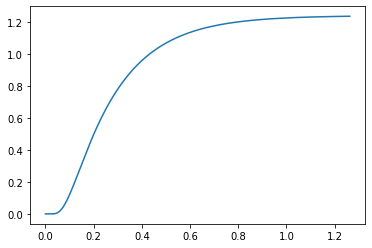

(0.43256483422135805, 1.0000113247900924)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm
nx = ny = 200
nu = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = 0.25
dt = sigma * dx * dy / nu

x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

u = np.zeros((ny, nx))
un = np.zeros((ny, nx))

time_elapsed = []
center_temp = []

for i in tqdm.tqdm(range(50000)):
    un = u.copy()
    u[1:-1, 1:-1] = (un[1:-1,1:-1] + 
                    nu * dt / dx**2 * 
                    (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) +
                    nu * dt / dy**2 * 
                    (un[2:,1: -1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1]))
    u[0,:] = 5
    u[-1,:] = 0
    u[:,0] = 0
    u[:,-1] = 0
    time_elapsed.append(dt*i)
    center_temp.append(u[nx//2,ny//2])
plt.plot(time_elapsed, center_temp)
plt.show()
print(min([(time_elapsed[i], center_temp[i]) for i in range(len(time_elapsed))], key = lambda x: abs(1-x[1])))

#### Plotting heat flow

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720


KeyboardInterrupt: ignored

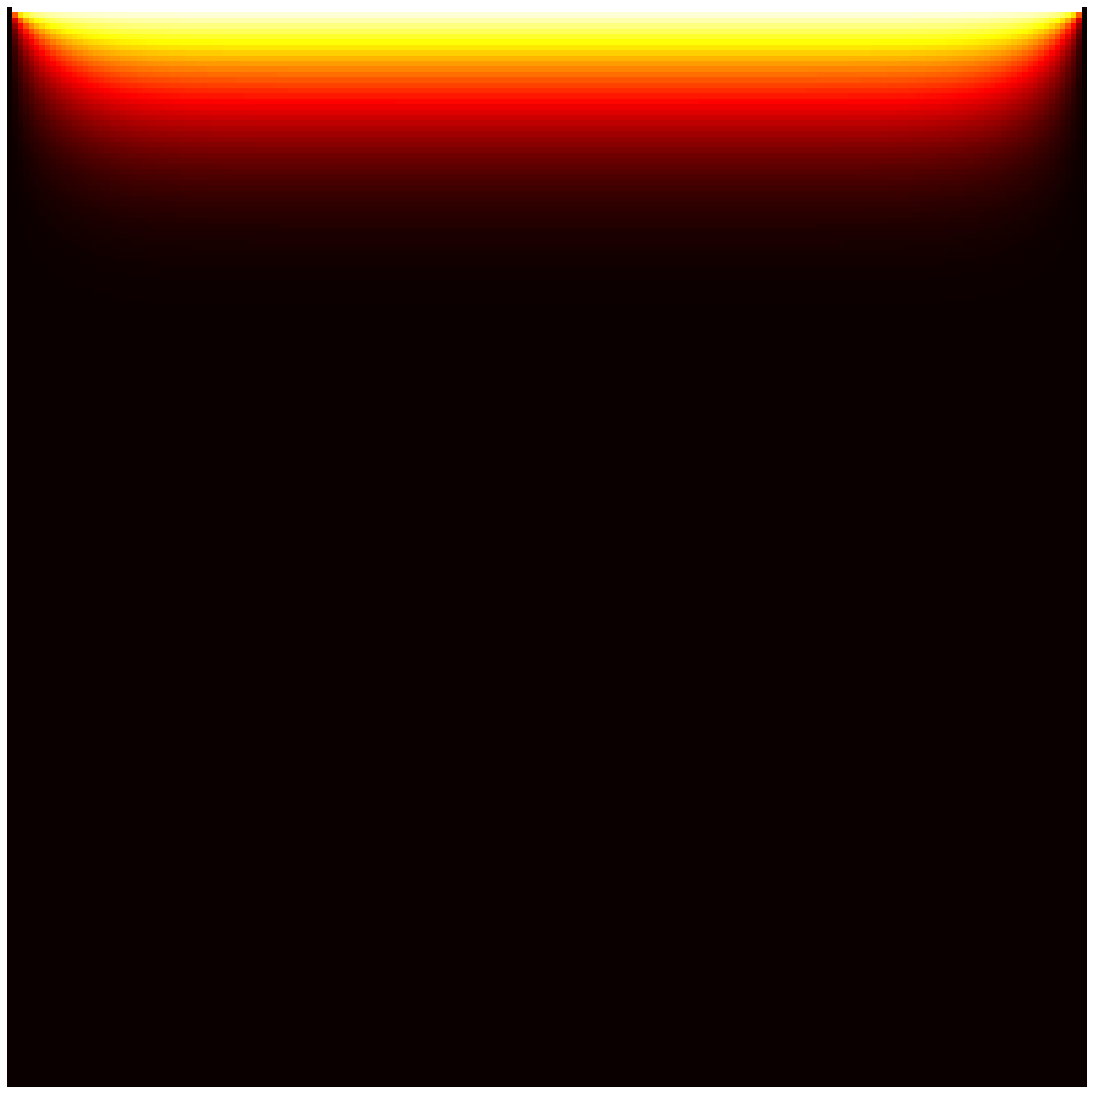

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
nx = ny = 200
nt = 17
nu = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = 0.25
dt = sigma * dx * dy / nu

x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

u = np.zeros((ny, nx))
un = np.zeros((ny, nx))
fig, ax = plt.subplots(figsize=(15,15))
fig.tight_layout()
ax = fig.add_axes((0, 0, 1, 1))
ax.axis("off")
def update():
    un = u.copy()
    u[1:-1, 1:-1] = (un[1:-1,1:-1] + 
                    nu * dt / dx**2 * 
                    (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) +
                    nu * dt / dy**2 * 
                    (un[2:,1: -1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1]))
    u[0,:] = 5
    u[-1,:] = 0
    u[:,0] = 0
    u[:,-1] = 0
    return [ax.imshow(u, cmap="hot",interpolation='nearest', aspect='auto')]
ims = []
for i in range(10000):
    if i%10==0: print(i)
    ims.append(update())
ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
    repeat_delay=1000)
ani.save("out.mp4")

In [1]:
from IPython.display import Video
Video("hot_plate.mp4")

### Attempt 2: Fourier Series

NOTE: Here, we are following the approach taken in [this paper](https://matheplanet.com/matheplanet/nuke/html/matroid/siam/siam_results.pdf)

We follow the approach taken in "Fourier Transforms" by Ian N. Sneddon (page 185)
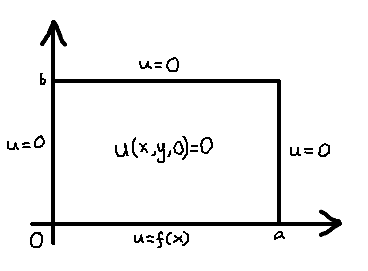





We want a function $ u(x,y,t) $ that represents the temperature at a point $(x,y)$ at time $t$. We solve for $u$ satisfying a more general situation and then plug in values specific to the given question.

Let $ u(x,y,t) $ satisfy the partial differential equation $$\kappa (\frac{\partial^2u}{\partial{x^2}} + \frac{\partial^2u}{\partial{y^2}}) = \frac{\partial{u}}{\partial{t}}$$ satisfying the boundary conditions 

$$u(x,0,t) = f(x), 0 \le x \le a, t > 0 $$
$$u(0,y,t) = u(a,y,t) = u(x,b,t) = u(x,y,0) = 0 $$

Next, note that by applying integration by parts, we get

$$\int_0^b \underbrace{dy  \; \frac{\partial^2{u}}{\partial{y}^2}}_{v'} \underbrace{\sin{(\frac{n \pi y}{b})}}_{u} = \left(\frac{\partial{u}}{\partial{y}} \sin{(\frac{n \pi y}{b})}\right) \Big|_{y=0}^{y=b} - \int_0^b \frac{\partial{u}}{\partial{y}}dy \cdot \frac{n\pi}{b} \cos{(\frac{n\pi y}{b})}$$

where the first term here goes away due to the boundary conditions. Applying integration by parts again, we get

$$ -\frac{n\pi}{b} \int_0^b \underbrace{\frac{\partial{u}}{\partial{y}}dy}_{v'} \cdot  \underbrace{\cos{(\frac{n\pi y}{b})}}_{u} = -\frac{n\pi}{b} \left( u \cos{(\frac{n\pi y}{b}) \Big|_{y=0}^{y=b}} - \int_0^b dy \; u \cdot \frac{-n \pi}{b} \sin{(\frac{n\pi y}{b})}\right) = \frac{n\pi}{b} f(x) - \frac{n^2 \pi^2}{b^2} \int_0^b dy \; u \sin{(\frac{n\pi y}{b})} $$

Therefore, we get that 

$$ \int_0^b dy \frac{\partial^2 u}{\partial y^2} \sin{(\frac{n \pi y}{b})} = \frac{n\pi}{b} f(x) - \frac{n^2 \pi^2}{b^2} \int_0^b dy \; u \sin{(\frac{n\pi y}{b})} $$

so, by multiplying both sides by $\sin{(\frac{m\pi x}{a})}$ and integrating from $x=0$ to $a$, we get

$$\int_0^a \int_0^b \frac{\partial^2 u}{\partial y^2} \sin{(\frac{m\pi x}{a})} \sin{(\frac{n \pi y}{b})} dy dx = \\ \frac{n\pi}{b} \underbrace{\int_0^a f(x)\sin{(\frac{m\pi x}{a})}dx}_{:=F_s(m)}  - \frac{n^2 \pi^2}{b^2} \underbrace{\int_0^a \int_0^b dy \; dx \; u(x,y,t) \sin{(\frac{m\pi x}{a})} \sin{(\frac{n\pi y}{b})}}_{:=U(m,n)}  \;\;\;\;\;\; (1)$$ 

Similarly, we get that

$$ \int_0^b \int_0^a \frac{\partial^2 u}{\partial x^2} \sin{(\frac{m \pi x}{a})}\sin{(\frac{n \pi y}{b})}dx dy = \frac{m^2 \pi^2}{a^2} U(m,n) $$

Therefore, we get that

$$\kappa (\frac{\partial^2u}{\partial{x^2}} + \frac{\partial^2u}{\partial{y^2}}) = \frac{\partial{u}}{\partial{t}}$$

$$\implies \sin{(\frac{m \pi x}{a})}\sin{(\frac{n \pi y}{b})} \left( \kappa (\frac{\partial^2u}{\partial{x^2}} + \frac{\partial^2u}{\partial{y^2}}) \right) = \sin{(\frac{m \pi x}{a})}\sin{(\frac{n \pi y}{b})} \left( \frac{\partial u}{\partial t}\right)$$

Next, integrating both sides over the whole rectangle, we get 

$$ \iint_R \sin{(\frac{m \pi x}{a})}\sin{(\frac{n \pi y}{b})} \left( \kappa (\frac{\partial^2u}{\partial{x^2}} + \frac{\partial^2u}{\partial{y^2}}) \right) dA  = \iint_R \sin{(\frac{m \pi x}{a})}\sin{(\frac{n \pi y}{b})} \left( \frac{\partial u}{\partial t}\right) dA $$

Note that by the [Leibniz integral rule](https://en.wikipedia.org/wiki/Leibniz_integral_rule), the right hand side of the above equation is simply $\frac{\partial U}{\partial t}$. Therefore, we get that

$$\frac{\partial U}{\partial t} + \kappa \pi^2 (\frac{m^2}{a^2} + \frac{n^2}{b^2}) U = \frac{\kappa n \pi}{b} F_s(m) $$

which is a first-order linear differential equation in $U$ with the additional boundary condition $U(m,n,0) = 0$. 

We now substitute in some known values from the given problem. We know immediately that $\kappa = 1, a=b=2$, and $ f(x) = 5 \implies F_s(m) = \int_0^a 5 \sin{(\frac{m\pi x}{2})}dx = \frac{20 \sin^2{(\frac{\pi m}{2}})}{\pi m} $. 

0


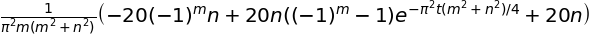

In [11]:
from sympy import *
m,n = symbols("m n", integer=True)
t = symbols("t")
U = Function("U")(t)

solution = dsolve(Eq(Derivative(U,t)+U*pi**2*(m**2+n**2)/4,n*pi/2*20*(sin(pi*m/2))**2 / (pi*m))).rhs
# Solve for boundary condition (i.e. U(0)=0)

C = solve(solution.subs(t, 0))
solution = solution.subs(C[0])

# Check to see if solution is correct
mu = pi**2 * (m**2 + n**2)/4
F_s = 20*(sin(pi*m/2))**2 / (pi*m)
temp = n*pi/(2*mu) * F_s * (1-exp(-mu*t))
print(simplify(temp - solution))
init_printing()
solution

##### Interlude: Inverse Fourier Transform

Let $F(m,n) = \int_0^2 \int_0^2 f(x,y) \sin{(\frac{m \pi x}{2})} \sin{(\frac{n\pi y}{2})} dx dy $ and assume $$f(x,y) = \sum_{(m',n')\in \mathbb{N}^2 } a_{m'n'} \sin{(\frac{m' \pi x}{2})} \sin{(\frac{n'\pi y}{2})} $$

We therefore have

$$F(m,n) = \int_0^2 \int_0^2 dx dy \sum_{(m',n')\in \mathbb{N}^2 } a_{m'n'} \sin{(\frac{m' \pi x}{2})} \sin{(\frac{n'\pi y}{2})} = \sum_{(m',n') \in \mathbb{N}^2 }  a_{m'n'} \left( \int_0^2 \sin{(\frac{m \pi x}{2}) \sin{(\frac{m' \pi x}{2})}} dx\right) \left( \int_0^2 \sin{(\frac{n \pi y}{2})} \sin{(\frac{n' \pi y}{2})} dy \right) = \sum_{(m',n') \in \mathbb{N}^2 } a_{m'n'} \delta_{mm'} \delta_{nn'} = a_{mn} $$

Therefore, we have that $$ \boxed{u(x,y,t) = \sum_{m=1}^\infty \sum_{n=1}^\infty \frac{20 n e^{- \frac{\pi^{2} t}{4} \left(m^{2} + n^{2}\right)}}{\pi^{2} m \left(m^{2} + n^{2}\right)} \left(\left(-1\right)^{m} + \left(- \left(-1\right)^{m} + 1\right) e^{\frac{\pi^{2} t}{4} \left(m^{2} + n^{2}\right)} - 1\right)
\sin{\frac{m \pi x}{2}} \sin{\frac{n \pi y}{2}}} $$

Substituting $x=y=1$, notice that only odd $m,n$ contribute to the sum. Therefore, substituting $ m = 2k+1, n = 2l+1$, we get


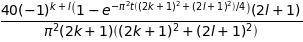

In [12]:
k,l = symbols("k l", integer=True)
summand = solution*sin(m*pi/2)*sin(n*pi/2)
summand = simplify(summand.subs({m: 2*k+1, n: 2*l+1}))
summand_f = lambdify([k,l,t], summand)

# Do some tidying

temp = summand.func(*summand.args[:-2]) 
temp2 = powsimp(expand(summand.args[-1]*summand.args[-2]),deep=True)
summand = simplify(temp*powsimp(factor(temp2)))
mu_ = (2*k+1)**2 + (2*l+1)**2
exponent = pi**2 * t / 2 * mu_ / -2
summand = summand.subs(pi**2*t/2*(-2*k*k-2*k-2*l*l-2*l-1), exponent)
summand_f = lambdify([k,l,t], summand)
summand

In [13]:
INFINITY = 1000
init_printing(pretty_print=False)
u = lambda t: sum([summand_f(k,l,t) for k in range(INFINITY) for l in range(INFINITY)])
from scipy.optimize import root_scalar
def f(t):
    print(t)
    return u(t)-1
root_scalar(f, x0=0, x1=1)

0.0
1
0.8099588985742797
0.6682955399298669
0.012794075968706077
0.5710628232006496
0.5076760213210352
0.38822545658832924
0.4323379157902649
0.4253289553839222
0.4246449705938235
0.4246577614704173
0.42465774037518617


      converged: True
           flag: 'converged'
 function_calls: 13
     iterations: 12
           root: 0.4246577403745265

Therefore, we have that
$$\boxed{u(t) = \sum_{k=0}^\infty \sum_{l=0}^\infty \frac{\left(-1\right)^{k + l} e^{- \frac{\pi^{2} t}{4} \left(\left(2 k + 1\right)^{2} + \left(2 l + 1\right)^{2}\right)}}{\pi^{2} \left(2 k + 1\right) \left(\left(2 k + 1\right)^{2} + \left(2 l + 1\right)^{2}\right)} \left(- 80 l + 40 \left(2 l + 1\right) e^{\frac{\pi^{2} t}{4} \left(\left(2 k + 1\right)^{2} + \left(2 l + 1\right)^{2}\right)} - 40\right)}$$

##### Interlude: A Weird Sum

We consider the following sum

$$\sum_{n=0}^\infty \frac{(-1)^n (2n+1)}{(2n+1)^2 - \frac{a^2}{4}}$$

Using partial fractions, we get
$$\sum_{n=0}^\infty (-1)^n \left( \frac{1}{4n+2-a} + \frac{1}{4n+2+a}\right) = \sum_{n=0}^\infty (-1)^n \int_0^1 (x^{4n+1-a} + x^{4n+1+a}) dx = \int_0^1 \sum_{n=0}^\infty (-1)^n x^{4n+1} (x^a + x^{-a}) dx = \int_0^1 \frac{x}{1+x^4} (x^a + x^{-a}) = \int_0^1 \frac{x^{a+1}}{1+x^4} + \int_0^1 \frac{x^{1-a}}{1+x^4} $$

We use the substitution $x=\frac{1}{u}, dx = \frac{-1}{u^2} dx $ in the second integral to get

$$\int_0^1 \frac{x^{a+1}}{1+x^4} dx + \int_{\infty}^1 \frac{u^{a-1}}{1+(1/u)^4} \cdot \frac{-1}{u^2} \cdot \frac{u^2}{u^2} = \int_0^1 \frac{x^{a+1}}{1+x^4} + \int_1^\infty \frac{x^{a+1}}{1+x^4} = \int_0^\infty \frac{x^{a+1}}{1+x^4}$$

Now, we substitute $y = \frac{1}{1+x^4} \implies x = (\frac{1-y}{y})^{1/4} \implies dx = \frac{-dy}{4y^2(\frac{1-y}{y})^{3/4}}$

We therefore have that our integral becomes $$\int_0^\infty y \cdot (\frac{1-y}{y})^{\frac{a+1}{4}} \cdot \frac{-dy}{4y^2(\frac{1-y}{y})^{3/4}} = \frac{1}{4} \int_0^\infty y^{\frac{-a-2}{4}} (1-y)^{\frac{a-2}{4}} = \frac{1}{4} B(\frac{2-a}{4}, \frac{2+a}{4}) $$ 

where $B(x,y)$ is the [Beta function](https://en.wikipedia.org/wiki/Beta_function). 

We can write this in terms of the gamma function to get

$$\frac{1}{4} \frac{\Gamma(\frac{2-a}{4})\Gamma(\frac{2+a}{4})}{\Gamma(1)} = \frac{\pi}{4\sin{(\frac{\pi(2+a)}{4})}} = \frac{\pi}{4}\sec{\frac{a\pi}{4}}$$

where we use [Euler's reflection formula](https://en.wikipedia.org/wiki/Gamma_function#General) in the first equality.

Taking a leap of faith, substituting $a \mapsto 2ia$ turns the original sum into
$$\sum_{n=0}^\infty \frac{(-1)^n (2n+1)}{(2n+1)^2 + a^2} = \frac{\pi}{4}\text{sech}{\left( \frac{\pi a}{2} \right)}$$

Let's check this:

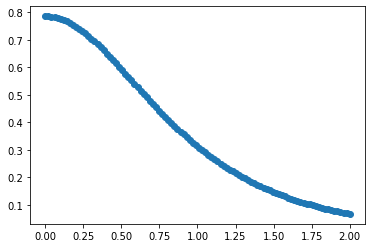

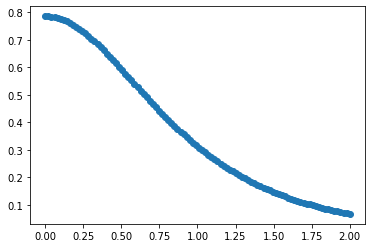

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import cosh, pi
f = lambda a: sum([pow(-1,n) * (2*n+1) / ((2*n+1)**2 + a**2) for n in range(1000)])
g = lambda a: pi/4 * 1/(np.cosh(pi*a/2))

x = np.linspace(0,2,100)
plt.scatter(x,f(x))
plt.show()
plt.scatter(x,g(x))
plt.show()

That's sufficient evidence for me!

##### Another Weird Sum

We now consider the sum 
$$\sum_{k=0}^\infty \frac{(-1)^k}{2k+1} \text{sech}\left(\pi k + \frac{\pi}{2}\right) = \frac{\pi}{8}$$

##TODO: Actually prove this sum

We just calculate this sum to a bunch of terms and try to identify it with the [PSLQ algorithm](https://en.wikipedia.org/wiki/Integer_relation_algorithm).

In [20]:
from math import cosh, pi
sech = lambda t: 1/cosh(t)
INFINITY = 50
summand = [pow(-1,k)/(2*k+1)*sech(pi*(k+0.5)) for k in range(INFINITY)]
from mpmath import *
identify(sum(summand),["pi","e"])

'((1/8)*pi)'

We therefore have that
$$\sum_{(k,l)\in \mathbb{N}^2 } \frac{40 \left(-1\right)^{k} \left(-1\right)^{l} \left(2 l + 1\right)}{\pi^{2} \left(2 k + 1\right) \left(\left(2 k + 1\right)^{2} + \left(2 l + 1\right)^{2}\right)} = \sum_{k \ge 0} \frac{40 (-1)^k }{\pi^2 (2k+1)} \sum_{l \ge 0} \frac{(-1)^l (2l+1)}{(2l+1)^2 + (2k+1)^2} = \sum_{k \ge 0} \frac{40 (-1)^k \text{sech}(\pi (k+1/2))}{\pi (2k+1)} = \frac{40}{\pi} \sum_{k=0}^\infty \frac{(-1)^k}{2k+1} \text{sech}\left(\pi k + \frac{\pi}{2}\right) = \frac{40}{\pi} \cdot \frac{\pi}{8} = \frac{5}{4} $$

And so our original sum becomes $$u(t) = \frac{5}{4} - \frac{40}{\pi^2} \sum_{k=0}^{\infty} \frac{(-1)^k}{2k+1} \sum_{l=0}^\infty \frac{(-1)^l (2l+1)}{(2k+1)^2 + (2l+1)^2} e^{-\pi^2 t/4 \; \cdot \; ((2k+1)^2 + (2l+1)^2)}$$

In [5]:
from math import pi, exp
from scipy.optimize import root_scalar
INFINITY = 1000
def u(t):
    print(t)
    return 5/4 - 40/(pi*pi)*sum([
        (-1)**k / (2*k+1) * sum([
            (-1)**l * (2*l+1) / ((2*k+1)**2 + (2*l+1)**2) * exp(-pi**2/4*t*((2*k+1)**2 + (2*l+1)**2))
        for l in range(INFINITY)])
    for k in range(INFINITY)])

root_scalar(lambda t: u(t)-1, x0=0, x1=1)

0.0
1
0.80931445650583
0.6672977947075767
0.012917560648138685
0.5699635631325781
0.5066108579750871
0.3879039493608965
0.4315845329426156
0.42466744818111046
0.4239990812124808
0.42401140690307043
0.42401138703428987


      converged: True
           flag: 'converged'
 function_calls: 13
     iterations: 12
           root: 0.42401138703368835

### Attempt 3: Reducing Dimensionality of the Problem

First, let's define some notation:
*   Let $P := \{(x,y): -1\le x,y \le 1\}$ be the square plate
*   Let $\partial P = \{(x,y): x \in \{-1,1\} \text{ or } y \in \{-1,1\}\}$ be the boundary of the square plate



Following the exposition in Bornemann's book, we reduce the problem from a two-dimensional one to a one-dimensional one as follows: because solutions of this equation are linear, we have that since we can choose any of the four sides to hold at $u=5$ and so we have that the condition holding all four sides to $u=5/4$ gives the same solution at the center of the plate



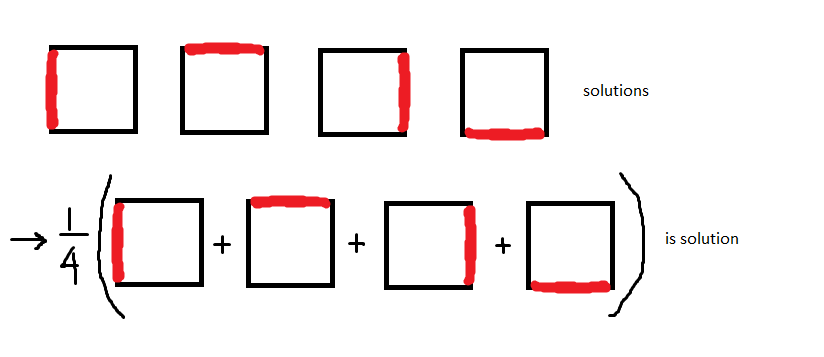

Therefore, an equivalent initial condition is $u(t,x,y)|_{(x,y) \in \partial P}=5/4$. 

Next, let $\hat{u}(x,y,t) = 5/4 - u(x,y,t)$. 

We therefore get that $$\partial_t \hat{u} = \Delta \hat{u} \; , \; \hat{u}(t,x,y)|_{(x,y) \in \partial P} = 0 \; , \; \hat{u}(0,x,y)|_{(x,y) \notin \partial P} = 5/4 $$.


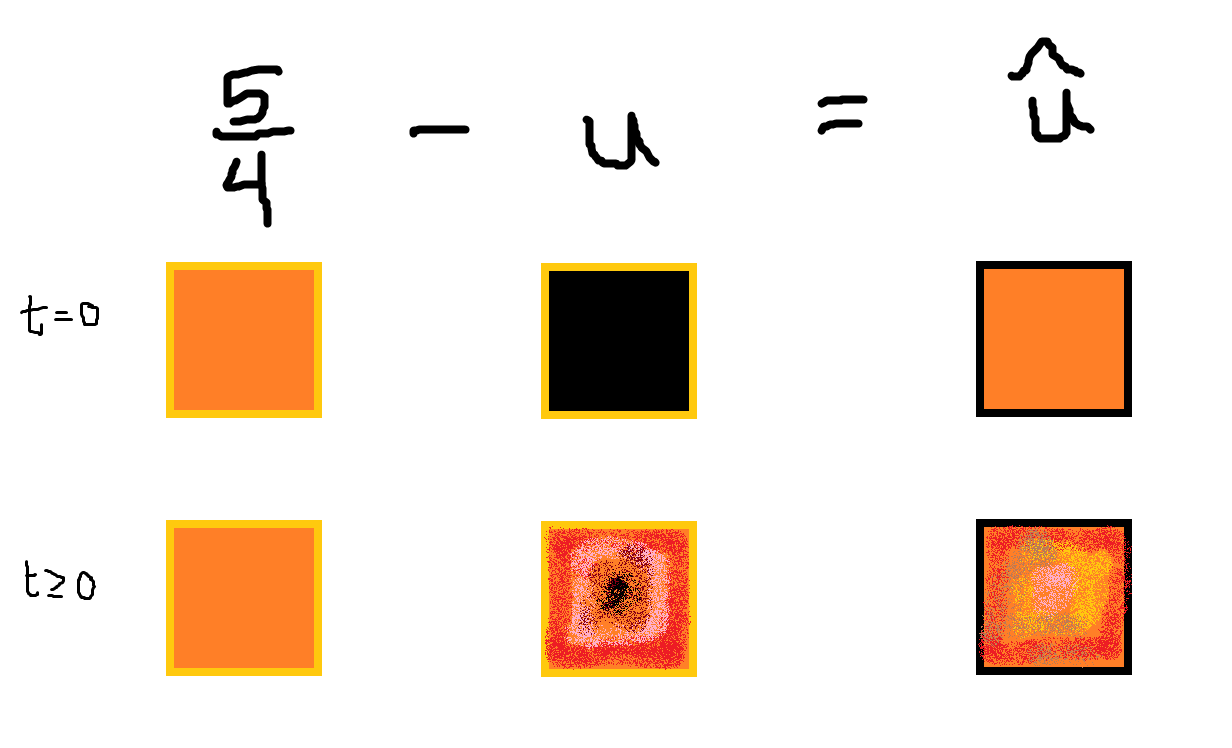

Next, we use seperation of variables and assume that $\hat{u}(x,y,t) = f(x,t)f(y,t) $. This implies that $f$ must satisfy

$$\partial_t f = \partial_{xx}f, f(t,-1) = f(t,1) = 0, f(0,x) = \sqrt{\frac{5}{4}} $$

The time we are looking for is the solution to $f(t,1) = \frac{1}{2}$.

If we make the substitution $x' = x+1 $, we get that our boundary conditons change to $f(t,0) = f(t,2) = 0$ and the interval we are looking at changes from $ x \in [-1,1] $ to $x' \in [0,2]$. 

We use seperation of variables again and assume that we have that (I'm too lazy to keep writing the hat so pretend I'm writing it)

$f(\hat{x},t) = X(x) T(t) $.

We therefore have that
$$\frac{T'}{T} = \frac{X''}{X} = k \implies \cases{T' = kT \\ X'' = k X } $$

We cannot have that k<0 as we have that 
$X'' = kX \implies X = c_1 e^{\sqrt{k}x} + c_2 e^{\sqrt{k}x} $ for some $ c_1, c_2 \in \mathbb{R}$, and therefore, solving for boundary conditions, we have that $\cases{c_1 + c_2 = 0  \\  c_1 e^{2 \sqrt{k}} + c_2 e^{-2 \sqrt{k}}} \implies c_1 = c_2 = 0$ and therefore, we have that this is just a trivial solution.

We cannot have that k=0 as in this case, we would have that $X'' = 0 \implies X = c_1 x + c_2$, and solving for boundary conditions, we have that $\cases{X(0) = c_2 = 0 \\ X(L) = c_1 L + c_2 = 0} \implies c_1 = c_2 = 0$ which also gives us just the trivial solution.

Therefore, we write $k$ as a negative constant by saying that $k = -\lambda^2$. 
We can solve for the first-order ODE for $T(t)$ fairly easily:

$$T'(t) = -\lambda^2 T(t) \implies T(t) = C e^{-\lambda^2 t} $$

We similarly solve for $X(x)$:

$X''(x) = -\lambda^2 X(x) \implies X'(x) = c_1 \cos(\lambda x) + c_2 \sin(\lambda x) $.

Note however that since we need that $X(0) = 0$, we must have that $c_1 = 0$.

We also have that $X(2) = 0$

$$\implies c_2 \sin(2 \lambda) = 0 \implies \lambda = \frac{\pi n}{2}, n \in \mathbb{Z} $$

However, note that since 
$\sin(\frac{-\pi n x}{2}) = \sin(\frac{\pi n x}{2})$, we can restrict $n$ to the positive integers.

We therefore have that 
$$f(x,t) = \sum_{n=0}^{\infty} c_n \sin(\frac{\pi n x}{2}) e^{-\frac{\pi^2 n^2 t}{4}} $$

Now, we use the final boundary condition $f(0,x) = \sqrt{5/4} = \sum_{n=0}^{\infty} c_n \sin(\frac{\pi n x}{2}) $ to find the values of $c_n$

Let $m \in \mathbb{N}$ be an arbitrary integer. Then, we have that


$$ \sqrt{5/4} = \sum_{n=0}^{\infty} c_n \sin(\frac{\pi n x}{2}) $$

$$ \implies \sqrt{5/4} \sin(\frac{\pi m x}{2}) = \sum_{n=0}^{\infty} c_n \sin(\frac{\pi m x}{2}) \sin(\frac{\pi n x}{2})$$

Now, integrating both sides of the equation from $x=0$ to $2$, we get on the left side that

$$ \int_0^2 \sqrt{5/4} \sin(\frac{\pi m x}{2}) dx = \frac{\sqrt{5} (1-\cos (\pi  m))}{\pi  m} = \frac{\sqrt{5}}{\pi  m} \left((-1)^{m+1}+1\right)$$

and on the right side, we have that

$$ \int_0^2 \sum_{n=0}^{\infty} c_n \sin(\frac{\pi m x}{2}) \sin(\frac{\pi n x}{2}) =  \sum_{n=0}^{\infty} c_n \int_0^2 \sin(\frac{\pi m x}{2}) \sin(\frac{\pi n x}{2}) = \sum_{n=0}^\infty c_n \delta_{mn} = c_m $$

We therefore have that $c_m = \cases{\frac{2\sqrt{5}}{(2l+1)\pi} \; \text{if } m=2l+1 \; \\ 0 \; \text{otherwise}}$ and our solution becomes

$$ f(\hat{x},t) = $$
$$f(x,t) = \sum_{n=0}^{\infty} \frac{2\sqrt{5}}{(2n+1)\pi} \sin(\frac{\pi (2n+1) \hat{x}}{2}) e^{-\frac{\pi^2 (2n+1)^2 t}{4}} $$

And so the temperature at the center becomes
$$u(t) = f(\hat{x},t)|_{\hat{x}=1} =  \sum_{n=0}^{\infty} \frac{2\sqrt{5}}{(2n+1)\pi} \sin(\frac{\pi (2n+1)}{2}) e^{-\frac{\pi^2 (2n+1)^2 t}{4}} = \frac{2\sqrt{5}}{\pi} \sum_{n=0}^{\infty} \frac{(-1)^n}{2n+1} e^{-\frac{\pi^2 (2n+1)^2 t}{4}}$$

We need to find the time $t_0$ such that $u(t) = 1/2$

In [4]:
from math import *
from scipy.optimize import root_scalar
INFINITY = 10000

# mp.dps = 500
def u(t):
    print(t)
    return 2*sqrt(5)/pi * sum([(-1)**n/(2*n+1) * exp(-pi**2/4 * t * (2*n+1)**2) for n in range(INFINITY)])

root_scalar(lambda t: u(t)-0.5, x0=0, x1=1)

0.0
1
0.6196861810476065
0.47311706041063817
0.41092732500494633
0.42481180111746225
0.42402416446409813
0.42401137448203585


      converged: True
           flag: 'converged'
 function_calls: 8
     iterations: 7
           root: 0.42401138703388525

In [7]:
from mpmath import *
mp.dps = 500
K = 2*sqrt(5)/pi
def u(t):
    print(t)
    return K * nsum(lambda n: (-1)**n/(2*n+1) * exp(-pi**2/4 * t * (2*n+1)**2), [0, inf])
findroot(lambda t: u(t)-0.5, 0)

0.0
0.0
0.25
0.43934109472574682668880049938503989160434623387538613200060324940723787441601500571568271794073824652171961416551210712507606924948925285259438255801702120721862615013030594161966491344079392583485266383362673761156277257467011140259911353838551977483721051550987346005277089932409405387264513636970063126153178059055638997322619968704735212080947208091087926709767423829277515642276289981793769004236636308318209196010275914586207178585979383540811153231625582517348634158624841985322192569304588845865559
0.42701346573100667485224916996780080239496058591295341453093847547868585857674020465193968273312388663156895701532827537617752715418002922253473164413605397799929739481547743867736365778841996429805640389934203153348317251502698051437162491974088462539947604831294916452923083230704569879621033086166424042960299196606439443799373324353203840399720013310242495397757516141378769887895833935666325720536591352313646444952239031200378678127638355369632768942662268844645392565401

mpf('0.42401138703368836379743366859325645124776209066427476219711249591331017695756369229707244229447701122202408200864627950176952715063094132933531748486364946855119847505425770123915415224176448531129533597298412346638387467712281173756363541490214501680915282853188397676800263740142602257158142280170819307091050290842616456937655839085278519925140012274453958629356567292414642637482069027100789622198416106503372714908908842164423214864734645931255854155865918629116319808287919789952186733946840728036')